### Lathund - logistisk regression

1. Load data: få in data som DataFrame för enkel hantering.

2. X/y: dela upp features och target.

3. Split: mät generalisering (testdata ska vara “osedd”).

4. Pipeline (Scaler + LR): skala först, träna sen – utan läckage.

5. Accuracy/Rapport/CM: bedöm hur bra modellen är och var felen sker.

6. Första 10 rader: få magkänsla för prediktion + säkerhet (P(max)).

### Steg 1: Ladda data till en DataFrame

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

bc = load_breast_cancer(as_frame = True)
df = bc.frame.copy()


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
X = df.drop(columns =["target"])    # X = alla numeriska features
y = df["target"]                    # y = 0/1 (0 = malignant, 1 = benign)

y.value_counts()

In [ ]:
class_names = bc.target_names                                       # Från sklearn-datat får du ordnade klassnamn som en array:['malignant', 'benign']
y_named = y.map({i: name for i, name in enumerate(class_names)})    # enumerate(class_names) ger par: (0, 'malignant'), (1, 'benign').

print("X-shape:", X.shape, "  y-shape:", y.shape)
print("\nKlassfördelning (namn):")
print(y_named.value_counts())

df.head()

### Steg 2: Train/Test-split + Pipeline (Scaler + Logistic Regression) + träna modellen   
Varför detta steg?   

- Split: vi behöver ett osett testset för rättvis utvärdering.  

- Pipeline: skalar först, tränar sen — utan dataläckage.

- fit: modellen lär vikter bara från TRAIN.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1) Dela data (stratify=y bevarar klassbalansen mellan train/test)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42, stratify = y
)

# 2) Pipeline: standardisera features -> träna logistisk regression (binär)
pipe = Pipeline([
    ("scaler", StandardScaler()),           # lär medel/std på TRAIN (undviker läckage
    ("clf", LogisticRegression(
        solver = "lbfgs", max_iter = 1000   # stabilt, binärt läge som default
    ))
])

# 3) Träna modellen på TRAIN
pipe.fit(X_train, y_train)

# 4) Liten sanity check
print("Train size: ", X_train.shape, "Test size: ", X_test.shape)

print("Snabb train-accuracy: ", round(pipe.score(X_train, y_train), 3))

Train size:  (426, 30) Test size:  (143, 30)
Snabb train-accuracy:  0.988


### Steg 3: utvärdera modellen på TEST (rapport + confusion matrix)

Accuracy (test):  0.986

Classification report:

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        53
      benign       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



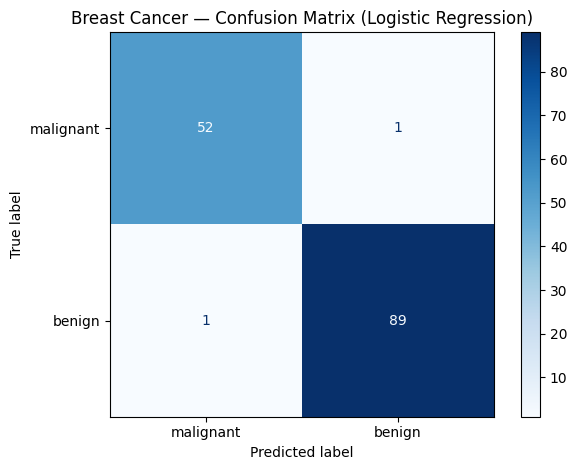

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Prediktioner på testdatan
y_pred = pipe.predict(X_test)

# 2) Snabb siffra: accuracy på test
print("Accuracy (test): ", round(pipe.score(X_test, y_test), 3))

# 3) Klassificeringsrapport: precision, recall, F1 och support per klass
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names = class_names))

# 4) Confusion matrix: rader = verklig klass, kolumner = prediktion
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels = class_names). plot(cmap = "Blues")
plt.title("Breast Cancer — Confusion Matrix (Logistic Regression)")
plt.tight_layout(); plt.show()